Importing Libraries

In [558]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


Reading Training Data

In [559]:
df=pd.read_csv("/content/drive/MyDrive/Predict Back orders/Kaggle_Training_Dataset.csv")

# Exploratory Data Analysis

In [560]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,2079834,23,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.0,-99.0,0,Yes,No,No,Yes,No,No
1,2079835,2,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.0,-99.0,0,Yes,No,No,Yes,No,No
2,2079836,6,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.0,-99.0,0,Yes,No,No,Yes,No,No
3,2079837,87,NaN,0,0,0,0,0,0,3,5,0,No,0,-99.0,-99.0,0,No,No,No,Yes,No,No
4,2080337,315,NaN,0,0,0,0,0,1,3,11,1,No,0,-99.0,-99.0,0,Yes,No,No,No,No,No


In [561]:
df.shape

(1693050, 23)

In [562]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693050 entries, 0 to 1693049
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sku                int64  
 1   national_inv       int64  
 2   lead_time          float64
 3   in_transit_qty     int64  
 4   forecast_3_month   int64  
 5   forecast_6_month   int64  
 6   forecast_9_month   int64  
 7   sales_1_month      int64  
 8   sales_3_month      int64  
 9   sales_6_month      int64  
 10  sales_9_month      int64  
 11  min_bank           int64  
 12  potential_issue    object 
 13  pieces_past_due    int64  
 14  perf_6_month_avg   float64
 15  perf_12_month_avg  float64
 16  local_bo_qty       int64  
 17  deck_risk          object 
 18  oe_constraint      object 
 19  ppap_risk          object 
 20  stop_auto_buy      object 
 21  rev_stop           object 
 22  went_on_backorder  object 
dtypes: float64(3), int64(13), object(7)
memory usage: 297.1+ MB


In [563]:
df.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.693050e+06,1.693050e+06,1.591716e+06,1.693050e+06,1.693050e+06,1.693050e+06,1.693050e+06,1.693050e+06,1.693050e+06,1.693050e+06,1.693050e+06,1.693050e+06,1.693050e+06,1.693050e+06,1.693050e+06,1.693050e+06
mean,3.442463e+06,4.940574e+02,7.908687e+00,4.031745e+01,1.816772e+02,3.431218e+02,5.018450e+02,5.365595e+01,1.735685e+02,3.407958e+02,5.120291e+02,5.237118e+01,1.737455e+00,-6.891604e+00,-6.437676e+00,6.507197e-01
std,7.751593e+05,2.922938e+04,7.040469e+00,1.066337e+03,5.458868e+03,9.703406e+03,1.382572e+04,1.689275e+03,5.151446e+03,9.399142e+03,1.399001e+04,1.281744e+03,2.615318e+02,2.657089e+01,2.583929e+01,4.215168e+01
min,2.063622e+06,-3.342300e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,2.983511e+06,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.100000e-01,6.600000e-01,0.000000e+00
50%,3.406774e+06,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,3.830036e+06,8.100000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.400000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.600000e-01,9.500000e-01,0.000000e+00
max,4.986465e+06,1.228510e+07,5.200000e+01,4.894080e+05,1.511160e+06,2.218752e+06,3.229292e+06,7.417620e+05,1.192407e+06,2.133557e+06,3.205172e+06,3.664620e+05,1.623320e+05,1.000000e+00,1.000000e+00,1.500000e+04


In [564]:
df.isnull().sum()

sku                       0
national_inv              0
lead_time            101334
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

Here we can see that expect leadtime all other columns doesn't have any missing values

In [565]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [566]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693050 entries, 0 to 1693049
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sku                int64  
 1   national_inv       int64  
 2   lead_time          float64
 3   in_transit_qty     int64  
 4   forecast_3_month   int64  
 5   forecast_6_month   int64  
 6   forecast_9_month   int64  
 7   sales_1_month      int64  
 8   sales_3_month      int64  
 9   sales_6_month      int64  
 10  sales_9_month      int64  
 11  min_bank           int64  
 12  potential_issue    object 
 13  pieces_past_due    int64  
 14  perf_6_month_avg   float64
 15  perf_12_month_avg  float64
 16  local_bo_qty       int64  
 17  deck_risk          object 
 18  oe_constraint      object 
 19  ppap_risk          object 
 20  stop_auto_buy      object 
 21  rev_stop           object 
 22  went_on_backorder  object 
dtypes: float64(3), int64(13), object(7)
memory usage: 297.1+ MB


In [567]:
#Finding categorical variables
categorical = [var for var in df.columns if df[var].dtype =='O']

print('There are {} categorical variables in training set.\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables in training set.

The categorical variables are : ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']


In [568]:
#Finding numerical variables
numerical = [var for var in df.columns if df[var].dtype !='O']

print('There are {} numerical variables in training set.\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 16 numerical variables in training set.

The numerical variables are : ['sku', 'national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']


Text(0, 0.5, 'counts')

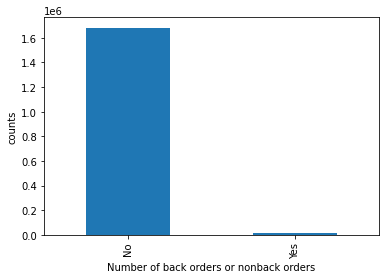

In [569]:
#Target variable analysis
fig = df['went_on_backorder'].value_counts().plot.bar()
fig.set_xlabel('Number of back orders or nonback orders')
fig.set_ylabel('counts')

Here we can see that our target varibale is highly imbalance

Text(0, 0.5, 'counts')

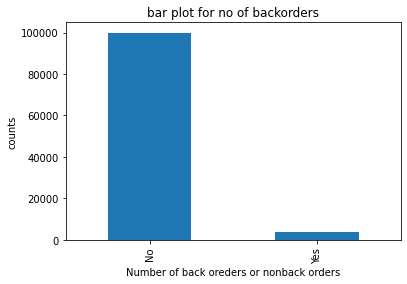

In [570]:
k=df[df['national_inv']==0]
fig =k['went_on_backorder'].value_counts().plot.bar()
fig.set_title('bar plot for no of backorders')
fig.set_xlabel('Number of back oreders or nonback orders')
fig.set_ylabel('counts')


Here we can see that very less products are there whose stock is zero with backorder


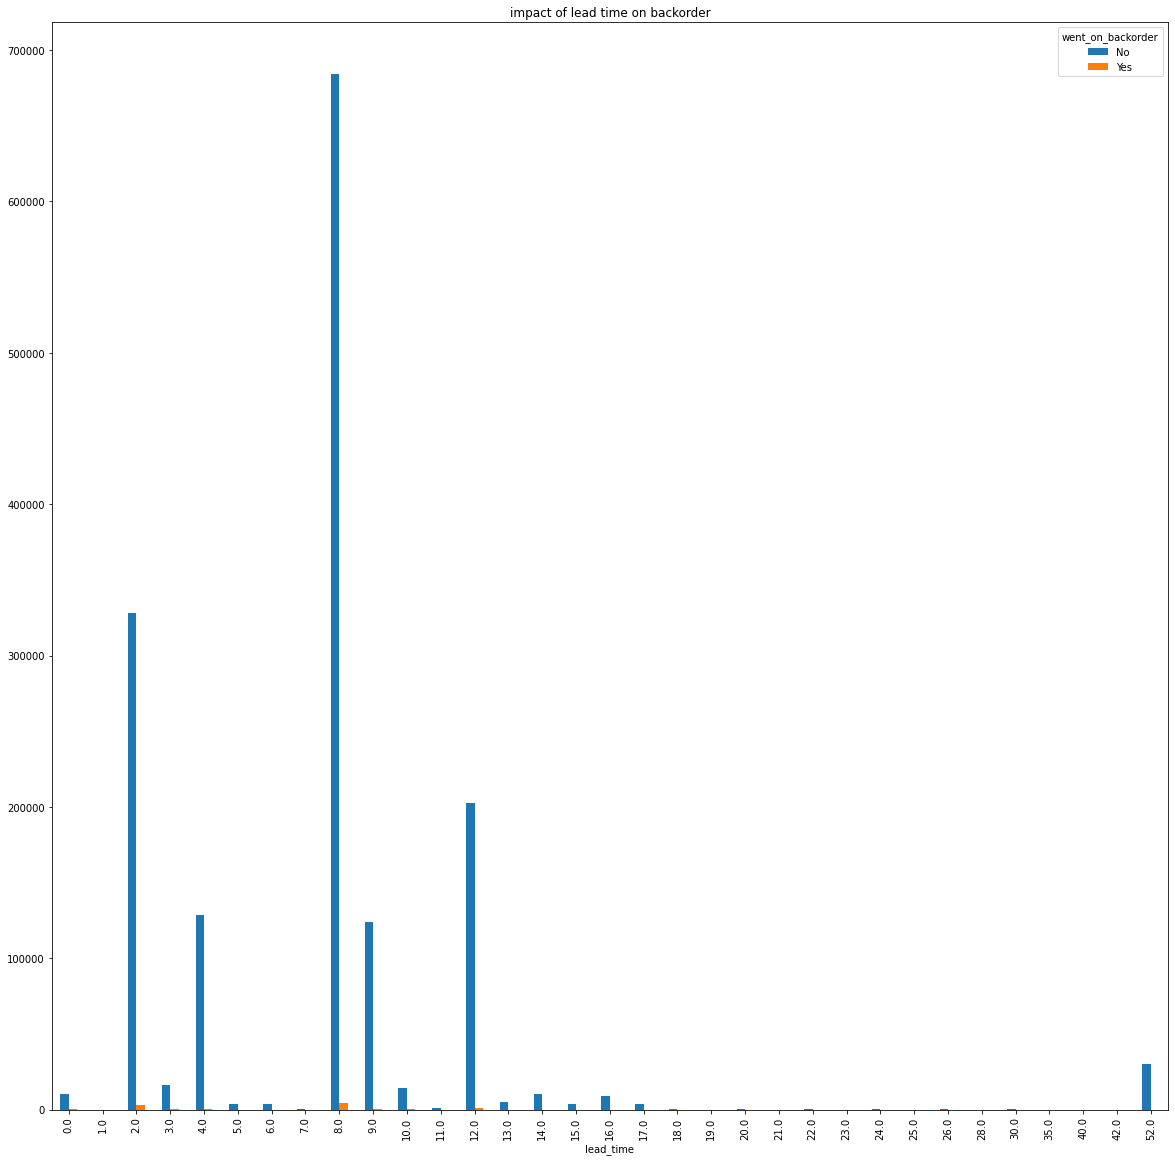

In [571]:
#impact of lead time on backorder
pd.crosstab(df.lead_time,df.went_on_backorder).plot(kind='bar',title='impact of lead time on backorder',figsize=(20,20))

Here we can see that favorable lead time is 8,2, and 12 days by this we can say that within 12 days company should deliver the product

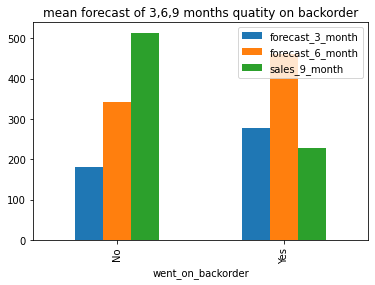

In [572]:
#impact of 3,6,9 avg forecast of products on backorders
d=df.pivot_table(index='went_on_backorder',aggfunc={'forecast_3_month':'mean','forecast_6_month':'mean','sales_9_month':'mean'})
d.plot.bar(title='mean forecast of 3,6,9 months quatity on backorder')


Here we can see that in backoders products whose 6 month forecast is highest went on backorders. So,in order to fix this stock upwe need to concentrate on demand for next 6-9 months

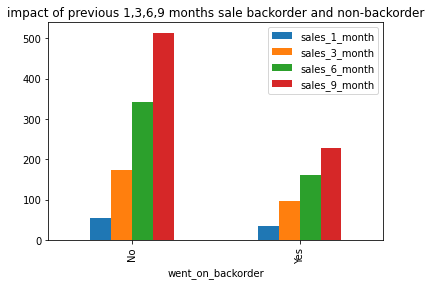

In [573]:
#impact of sales on backorders
d=df.pivot_table(index='went_on_backorder',aggfunc={'sales_1_month':'mean','sales_3_month':'mean','sales_6_month':'mean','sales_9_month':'mean'})
d.plot.bar(title='impact of previous 1,3,6,9 months sale backorder and non-backorder')


In [574]:
df.isnull().sum()

sku                       0
national_inv              0
lead_time            101334
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

In [575]:
renaming={"went_on_backorder":{"Yes":1,"No":0}}
df.replace(renaming,inplace=True)

Here we can see that went on back order is uour target variable which doesn't have any null values

In [576]:
data=df.copy()

In [577]:
#since sku(product id) will not play an important role in model building so i m deleting sku here 
data.drop(labels='sku',axis=1,inplace=True)

In [578]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels='went_on_backorder', axis=1),  # predictors
    data['went_on_backorder'],  # target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1185135, 21), (507915, 21))

In [579]:
categorical = [var for var in X_train.columns if X_train[var].dtype =='O']

print('There are {} categorical variables in training set.\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables in training set.

The categorical variables are : ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop']


In [580]:
# find numerical variables

numerical = [var for var in X_train.columns if X_train[var].dtype !='O']

print('There are {} numerical variables in training set.\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 15 numerical variables in training set.

The numerical variables are : ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']


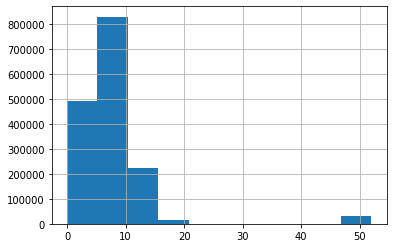

In [581]:
data['lead_time'].hist()

#Feature Engineering

In [582]:
pip install feature_engine

In [583]:
from feature_engine.imputation import MeanMedianImputer


In [584]:
 median_imputer= MeanMedianImputer(imputation_method='median', variables = ['lead_time'])

In [585]:
median_imputer.fit(X_train)

MeanMedianImputer(imputation_method='median', variables=['lead_time'])

In [586]:
# let's transform the data with the pipeline
X_train_imp= median_imputer.transform(X_train)
X_test_imp= median_imputer.transform(X_test)



In [587]:
X_train_no_miss=X_train_imp.copy()
X_test_no_miss=X_test_imp.copy()

In [588]:
y_train_no_miss=y_train.copy()
y_test_no_miss=y_test.copy()

In [589]:
from feature_engine.encoding import OrdinalEncoder

In [590]:
ordinal_enc = OrdinalEncoder(
    # NOTE that we indicate ordered in the encoding_method, otherwise it assings numbers arbitrarily
    encoding_method='ordered',
    variables=categorical)

In [591]:
ordinal_enc.fit(X_train_no_miss,y_train_no_miss)

OrdinalEncoder(encoding_method='ordered', ignore_format=False,
               variables=['potential_issue', 'deck_risk', 'oe_constraint',
                          'ppap_risk', 'stop_auto_buy', 'rev_stop'])

In [592]:
X_train_ordered = ordinal_enc.transform(X_train_no_miss)
X_test_ordered = ordinal_enc.transform(X_test_no_miss)

In [593]:
from feature_engine.encoding import WoEEncoder, RareLabelEncoder

In [594]:
woe_enc = WoEEncoder(variables=categorical)

In [595]:
woe_enc.fit(X_train_no_miss, y_train_no_miss)

WoEEncoder(ignore_format=False,
           variables=['potential_issue', 'deck_risk', 'oe_constraint',
                      'ppap_risk', 'stop_auto_buy', 'rev_stop'])

In [596]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [597]:
def run_randomForests(X_train, X_test, y_train, y_test):

    rf = RandomForestClassifier(n_estimators=50, random_state=39, max_depth=3)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [598]:
from sklearn.linear_model import LogisticRegression


In [599]:
def run_logistic(X_train, X_test, y_train, y_test):

    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=44, C=0.01)
    logit.fit(X_train, y_train)

    print('Train set')
    pred = logit.predict_proba(X_train)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = logit.predict_proba(X_test)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [600]:
# ordered labels
run_randomForests(X_train_ordered, X_test_ordered, y_train_no_miss, y_test_no_miss)

Train set
Random Forests roc-auc: 0.9105436006900218
Test set
Random Forests roc-auc: 0.9118574712846099


In [601]:
# ordered labels
run_logistic(X_train_ordered, X_test_ordered, y_train_no_miss, y_test_no_miss)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train set
Logistic Regression roc-auc: 0.6614677130394059
Test set
Logistic Regression roc-auc: 0.6595478298096153


In [602]:
import scipy.stats as stats
from feature_engine import transformation as vt
import matplotlib.pyplot as plt

In [603]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

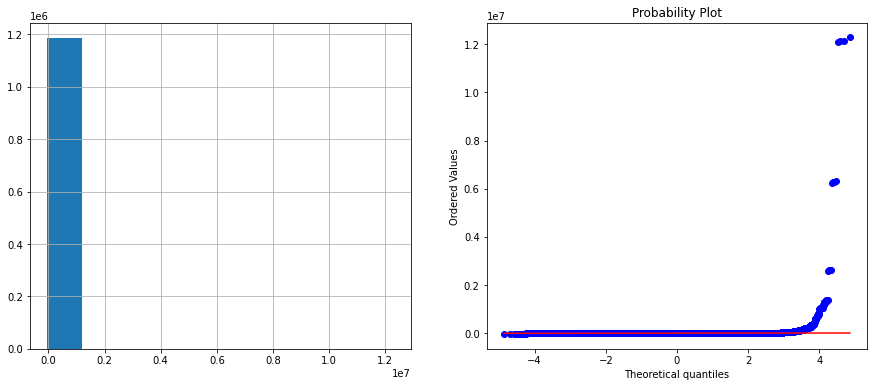

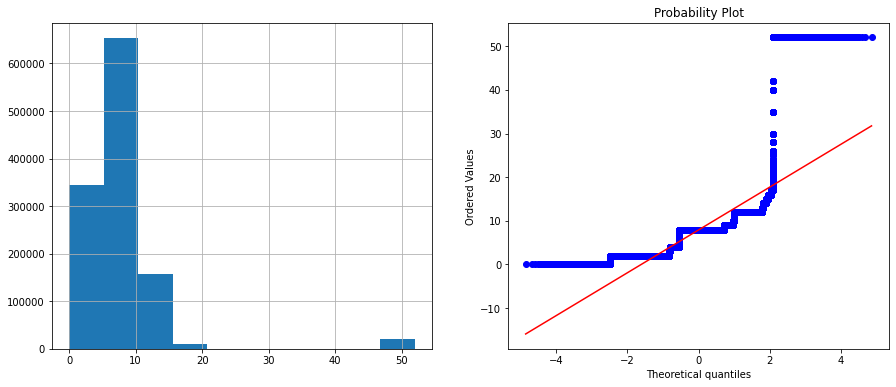

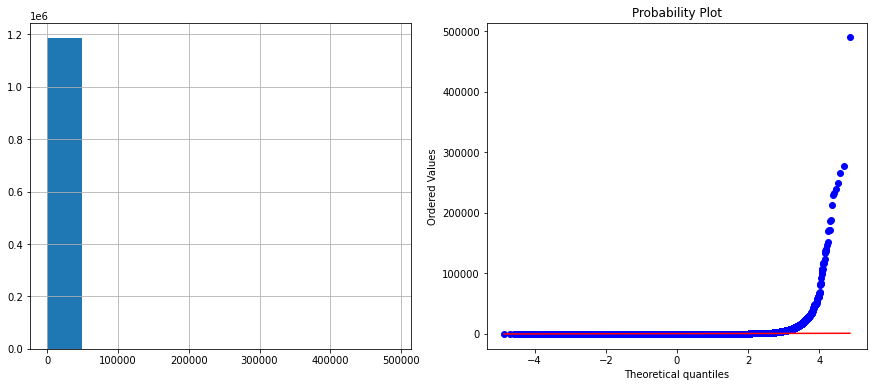

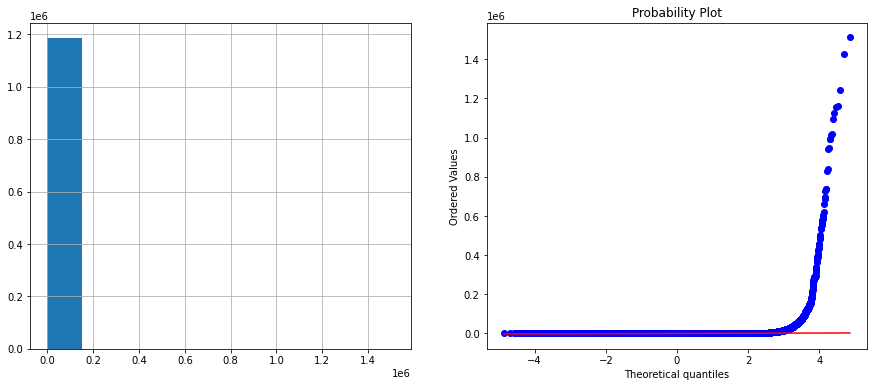

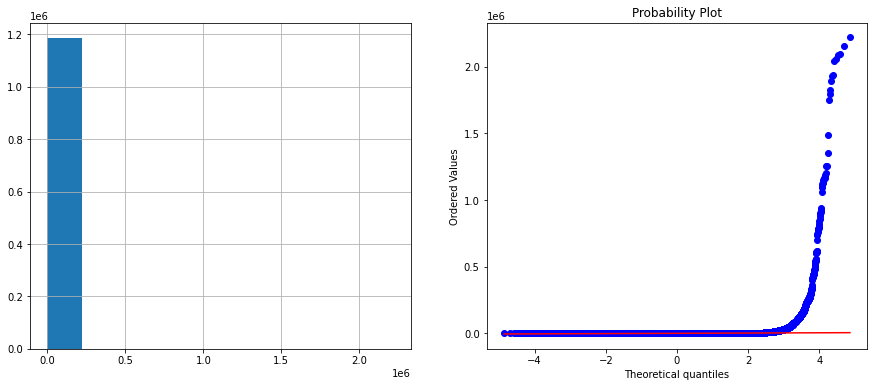

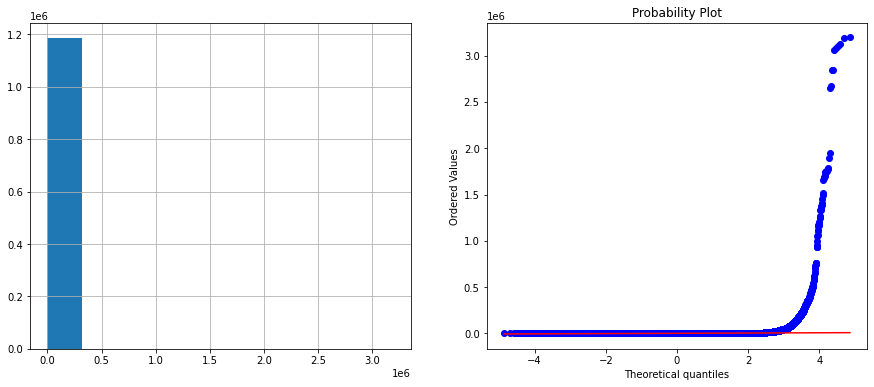

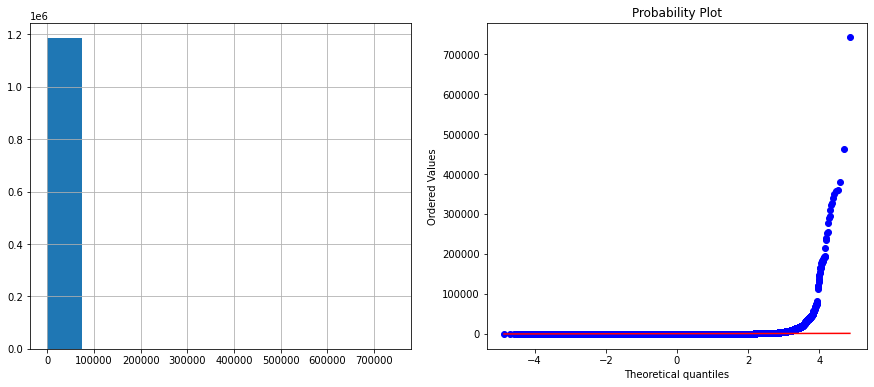

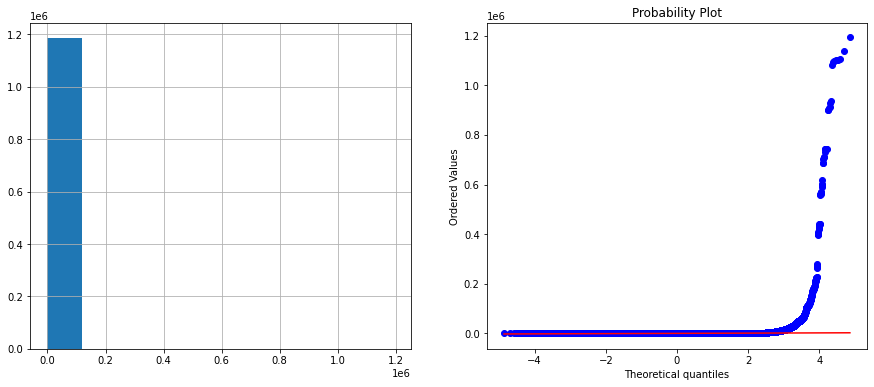

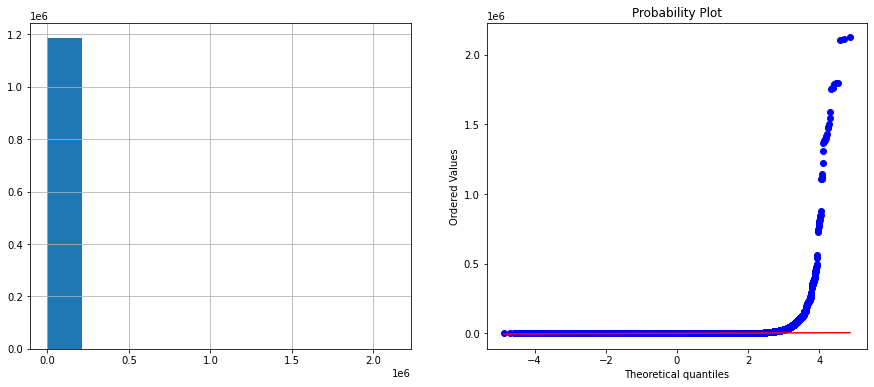

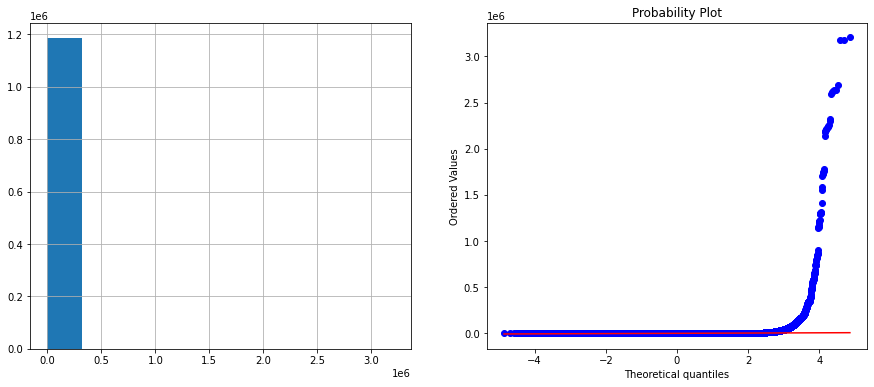

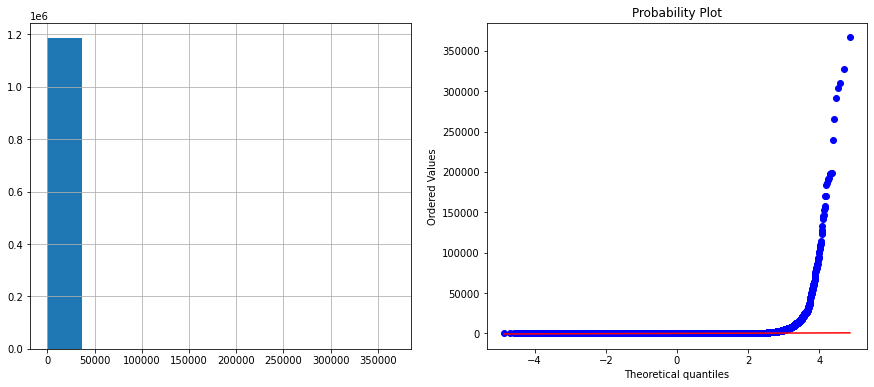

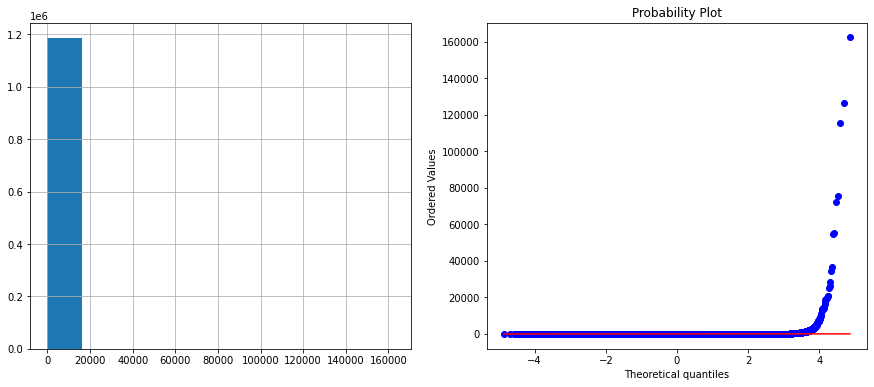

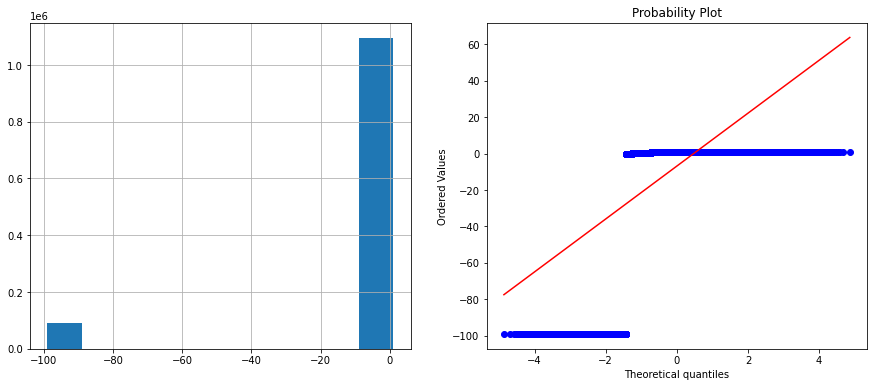

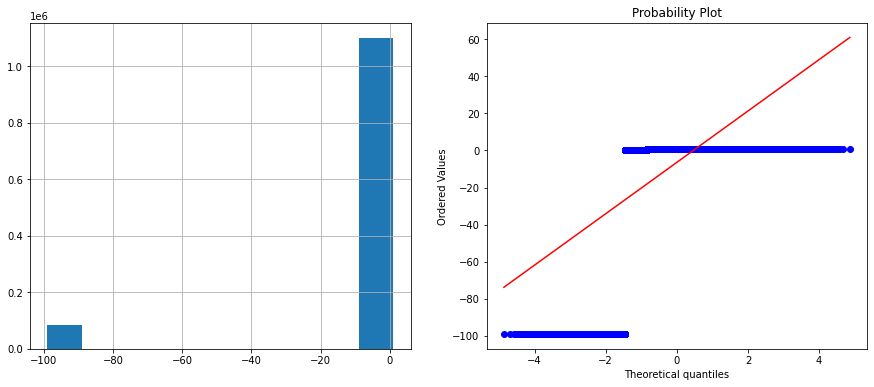

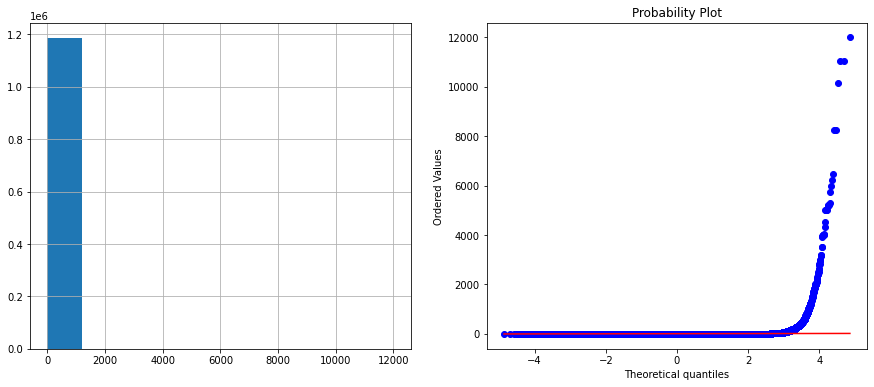

In [604]:
#here i m checking for the normality of numerical values before encoding i applied , non of the numerical variable is normaly distributed 
for i in numerical:
    diagnostic_plots(X_train_ordered, i)

In [605]:
#here i have performed transformation on numerical varaible of the train data set only 
yjt = vt.YeoJohnsonTransformer(variables = numerical)
yjt.fit(X_train_ordered)


YeoJohnsonTransformer(variables=['national_inv', 'lead_time', 'in_transit_qty',
                                 'forecast_3_month', 'forecast_6_month',
                                 'forecast_9_month', 'sales_1_month',
                                 'sales_3_month', 'sales_6_month',
                                 'sales_9_month', 'min_bank', 'pieces_past_due',
                                 'perf_6_month_avg', 'perf_12_month_avg',
                                 'local_bo_qty'])

In [606]:
X_train_ordered_GT = yjt.transform(X_train_ordered)
X_test_ordered_GT=yjt.transform(X_test_ordered)

In [607]:
y_train=y_train_no_miss.copy()
y_test=y_test_no_miss.copy()

In [608]:
#now we will run the random forest algo for numerical transformation only
run_randomForests(X_train_ordered_GT,X_test_ordered_GT , y_train, y_test)

Train set
Random Forests roc-auc: 0.9106728605999916
Test set
Random Forests roc-auc: 0.9119487718512157


In [609]:
# now we will run the losgistic regression algo for numerical variable  transformation only
run_logistic(X_train_ordered_GT,X_test_ordered_GT, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train set
Logistic Regression roc-auc: 0.7204589918568758
Test set
Logistic Regression roc-auc: 0.7167470537637054


In [610]:
from feature_engine.discretisation import EqualWidthDiscretiser

In [611]:
#here i m performing discretisation for only numericals columns

disc = EqualWidthDiscretiser(bins=10, variables = numerical)

In [612]:
disc.fit(X_train_ordered_GT)

EqualWidthDiscretiser(bins=10, return_boundaries=False, return_object=False,
                      variables=['national_inv', 'lead_time', 'in_transit_qty',
                                 'forecast_3_month', 'forecast_6_month',
                                 'forecast_9_month', 'sales_1_month',
                                 'sales_3_month', 'sales_6_month',
                                 'sales_9_month', 'min_bank', 'pieces_past_due',
                                 'perf_6_month_avg', 'perf_12_month_avg',
                                 'local_bo_qty'])

In [613]:
# transform train and text

X_train_ordered_GT_des_eq = disc.transform(X_train_ordered_GT)
X_test_ordered_GT_des_eq = disc.transform(X_test_ordered_GT)

In [614]:
import matplotlib.pyplot as plt

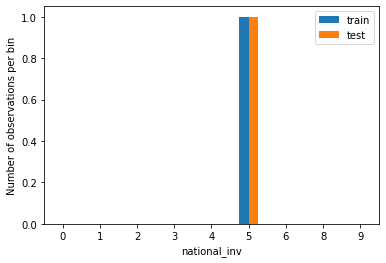

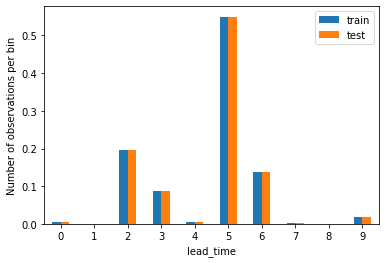

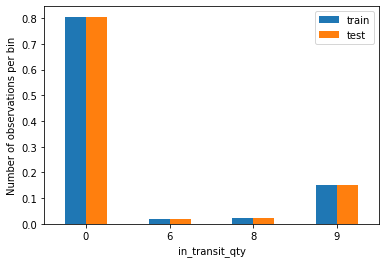

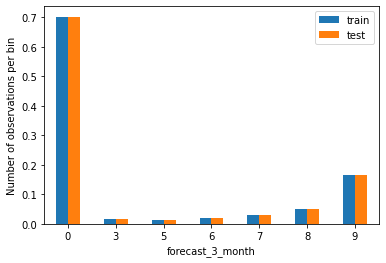

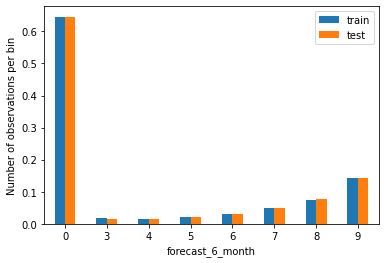

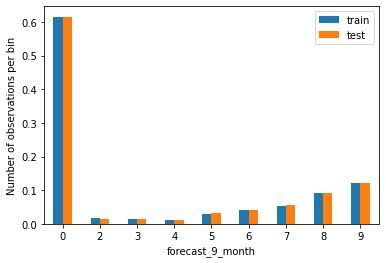

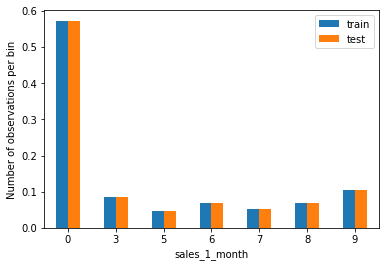

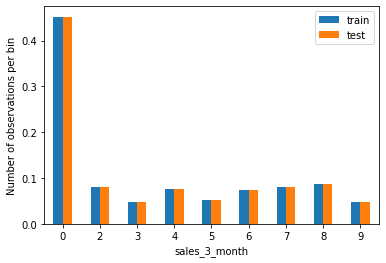

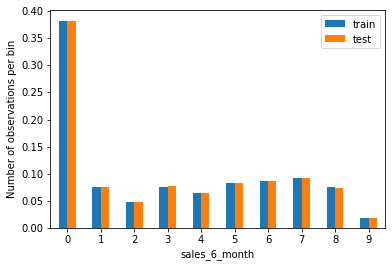

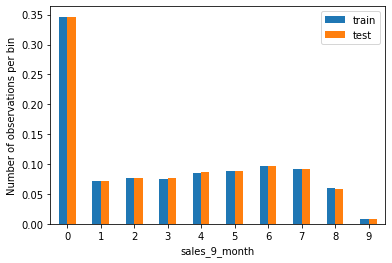

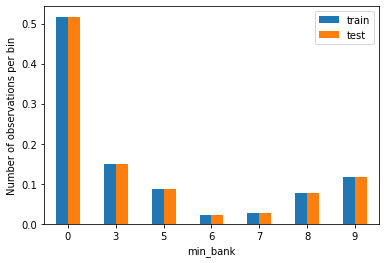

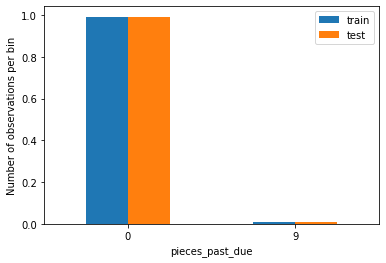

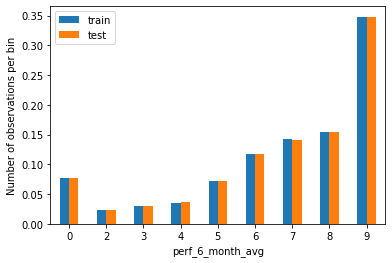

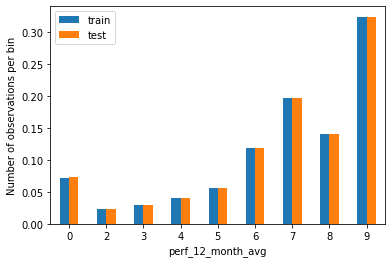

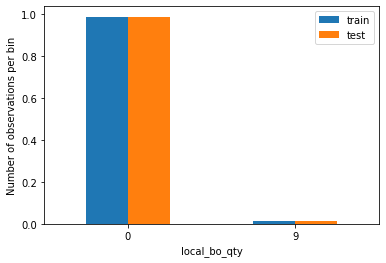

In [615]:
for i in numerical:
    t1 = X_train_ordered_GT_des_eq.groupby([i])[i].count() / len(X_train_ordered_GT_des_eq)
    t2 = X_test_ordered_GT_des_eq.groupby([i])[i].count() / len(X_test_ordered_GT_des_eq)

    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['train', 'test']
    tmp.plot.bar()
    plt.xticks(rotation=0)
    plt.ylabel('Number of observations per bin')

In [616]:
from feature_engine.discretisation import DecisionTreeDiscretiser

In [617]:
treeDisc = DecisionTreeDiscretiser(cv=3, scoring='accuracy',
                                   variables=numerical,
                                   regression=False,
                                   param_grid={'max_depth': [ 2, 3],
                                              'min_samples_leaf':[10,4]})

treeDisc.fit(X_train_ordered_GT, y_train)

DecisionTreeDiscretiser(cv=3,
                        param_grid={'max_depth': [2, 3],
                                    'min_samples_leaf': [10, 4]},
                        random_state=None, regression=False, scoring='accuracy',
                        variables=['national_inv', 'lead_time',
                                   'in_transit_qty', 'forecast_3_month',
                                   'forecast_6_month', 'forecast_9_month',
                                   'sales_1_month', 'sales_3_month',
                                   'sales_6_month', 'sales_9_month', 'min_bank',
                                   'pieces_past_due', 'perf_6_month_avg',
                                   'perf_12_month_avg', 'local_bo_qty'])

In [618]:
# let's transform the data

X_train_ordered_GT_des_t = treeDisc.transform(X_train_ordered_GT)
X_test_ordered_GT_des_t = treeDisc.transform(X_test_ordered_GT)


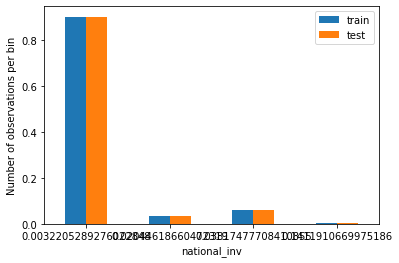

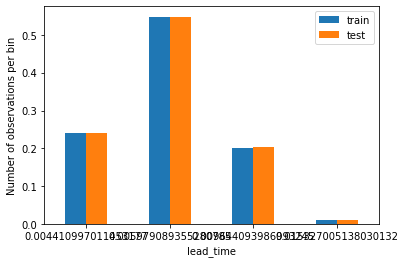

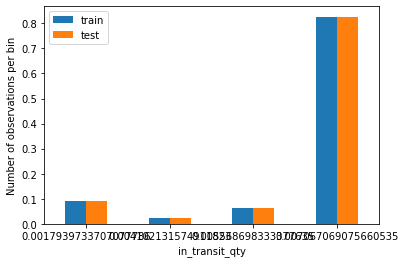

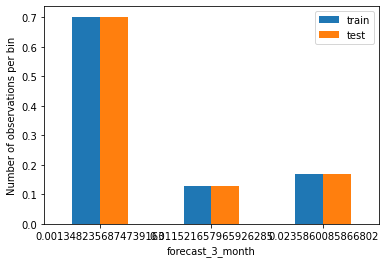

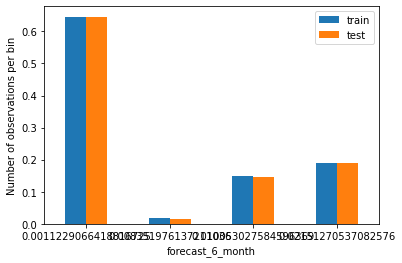

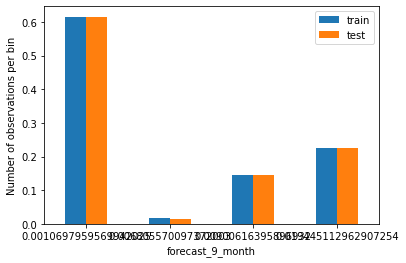

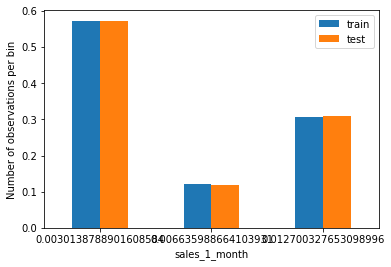

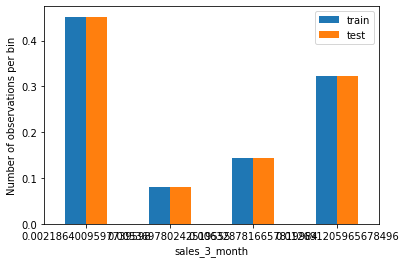

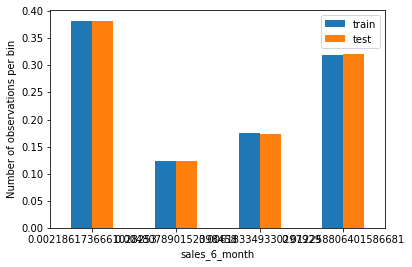

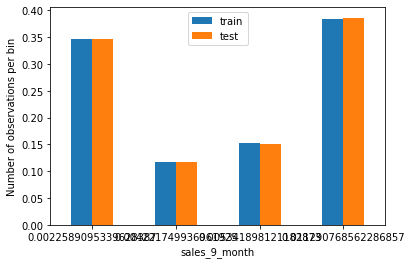

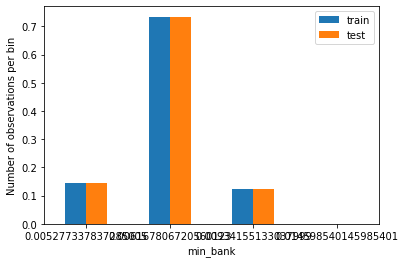

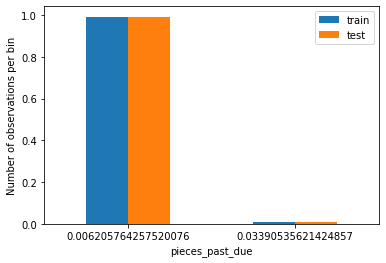

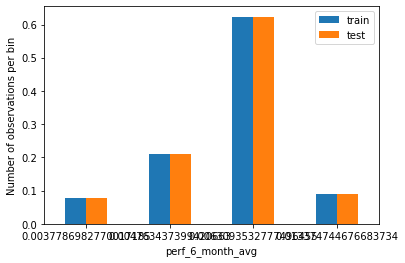

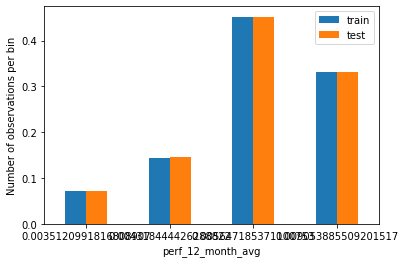

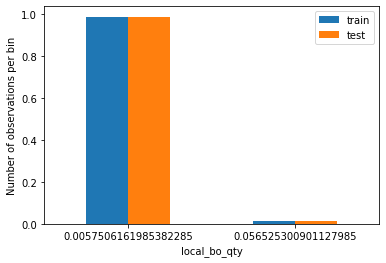

In [619]:
for i in numerical:
    t1 = X_train_ordered_GT_des_t.groupby([i])[i].count() / len(X_train_ordered_GT_des_t)
    t2 = X_test_ordered_GT_des_t.groupby([i])[i].count() / len(X_test_ordered_GT_des_t)

    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['train', 'test']
    tmp.plot.bar()
    plt.xticks(rotation=0)
    plt.ylabel('Number of observations per bin')

In [620]:
#random forest with euql descritisation 
run_randomForests(X_train_ordered_GT_des_eq,X_test_ordered_GT_des_eq, y_train, y_test)

Train set
Random Forests roc-auc: 0.8772766979875404
Test set
Random Forests roc-auc: 0.8793723763175477


In [621]:
#logistic reggression  with euql descritisation 
run_logistic(X_train_ordered_GT_des_eq,X_test_ordered_GT_des_eq, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train set
Logistic Regression roc-auc: 0.8677891499496095
Test set
Logistic Regression roc-auc: 0.8709552182347305


In [622]:
#random forest with descision tree descritisation 
run_randomForests(X_train_ordered_GT_des_t,X_test_ordered_GT_des_t, y_train, y_test)

Train set
Random Forests roc-auc: 0.9004439720317836
Test set
Random Forests roc-auc: 0.9016677672470267


In [623]:
#logistic reggression with descision tree descritisation 
run_logistic(X_train_ordered_GT_des_t,X_test_ordered_GT_des_t, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7511072074973976
Test set
Logistic Regression roc-auc: 0.7496252194065163


In [624]:
# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler

In [625]:
#standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train_ordered_GT_des_t)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [626]:
X_train_ordered_GT_des_t_scaled = scaler.transform(X_train_ordered_GT_des_t)
X_test_ordered_GT_des_t_scaled = scaler.transform(X_test_ordered_GT_des_t)

In [627]:
#random forest with decision tree descritisation in succession scaling
run_randomForests(X_train_ordered_GT_des_t_scaled,X_test_ordered_GT_des_t_scaled, y_train, y_test)

Train set
Random Forests roc-auc: 0.9004439720317836
Test set
Random Forests roc-auc: 0.9016677672470267


In [628]:
#logistic reggression  with decision tree descritisation in succession scaling
run_logistic(X_train_ordered_GT_des_t_scaled,X_test_ordered_GT_des_t_scaled, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8776045612995198
Test set
Logistic Regression roc-auc: 0.8818458314673503


In [629]:
scaler.fit(X_train_ordered_GT_des_eq)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [630]:
X_train_ordered_GT_des_eq_scaled = scaler.transform(X_train_ordered_GT_des_eq)
X_test_ordered_GT_des_eq_scaled = scaler.transform(X_test_ordered_GT_des_eq)

In [631]:
#random forest with eq descritisation in succession scaling
run_randomForests(X_train_ordered_GT_des_eq_scaled,X_test_ordered_GT_des_eq_scaled, y_train, y_test)

Train set
Random Forests roc-auc: 0.8772766979875404
Test set
Random Forests roc-auc: 0.8793723763175477


In [632]:
#logistic reggression  with eq descritisation in succession scaling
run_logistic(X_train_ordered_GT_des_eq_scaled,X_test_ordered_GT_des_eq_scaled, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8681173570388345
Test set
Logistic Regression roc-auc: 0.8705850771105066


#Feature Selection

In [633]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

In [634]:
X_train=X_train_ordered_GT_des_t.copy()
X_test=X_test_ordered_GT_des_t.copy()
y_train=y_train.copy()
y_test=y_test.copy()

In [635]:

X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [636]:
#before removing constant features
X_train.shape,X_test.shape

((1185135, 21), (507915, 21))

In [637]:
# remove constant features
constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]
 
X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)
 
X_train.shape, X_test.shape

((1185135, 21), (507915, 21))

In [638]:
# check for duplicated features in the training set
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)
 
    col_1 = X_train.columns[i]
 
    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)#no of duplicate features?

0
10
20


0

In [639]:
# remove duplicated features
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)
 
X_train.shape, X_test.shape


((1185135, 21), (507915, 21))

In [640]:

 
X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

In [641]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
 
corr_features = correlation(X_train, 0.85)
print('correlated features: ', len(set(corr_features)) )

correlated features:  3


In [642]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)
 
X_train.shape, X_test.shape

((1185135, 18), (507915, 18))

In [643]:
# keep a copy of the dataset at  this stage
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

In [644]:
# find important features using univariate roc-auc
 
# loop to build a tree, make predictions and get the roc-auc
# for each feature of the train set
 
roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

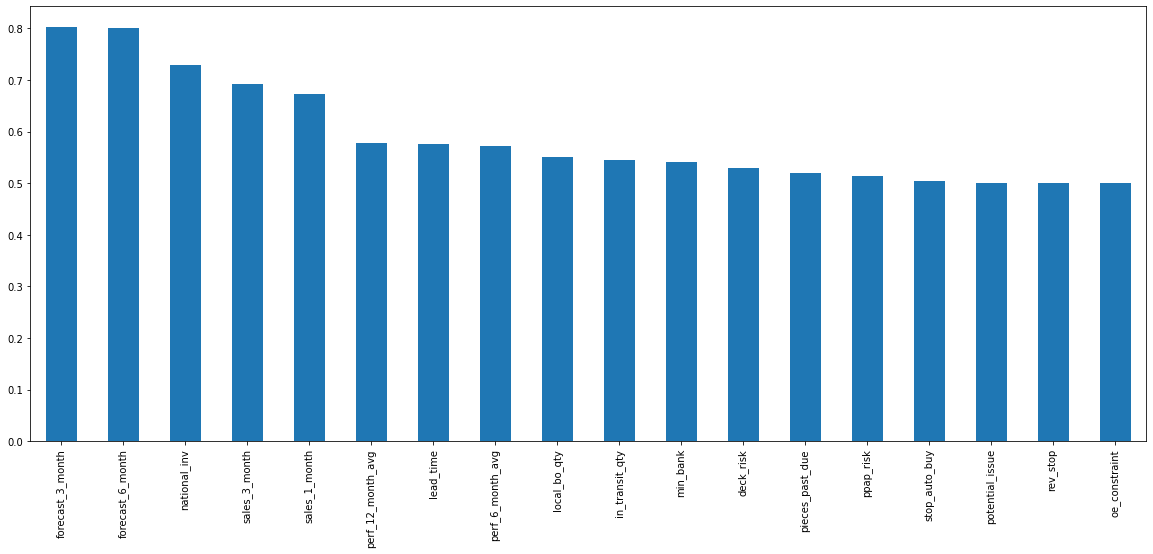

In [645]:
# let's add the variable names and order it for clearer visualisation
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [646]:
# by removing features with univariate roc_auc == 0.5
# we remove another 30 features
 
selected_feat = roc_values[roc_values>0.5]
len(selected_feat), X_train.shape[1]

(18, 18)

In [647]:
# select features using the impotance derived from
# random forests
 
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=200))
sel_.fit(X_train, y_train)
 
# remove features with zero coefficient from dataset
# and parse again as dataframe (output of sklearn is
# numpy array)
X_train_rf = pd.DataFrame(sel_.transform(X_train))
X_test_rf = pd.DataFrame(sel_.transform(X_test))
 
# add the columns name
X_train_rf.columns = X_train.columns[(sel_.get_support())]
X_test_rf.columns = X_train.columns[(sel_.get_support())]

In [648]:
X_train_rf.shape, X_test_rf.shape

((1185135, 9), (507915, 9))

In [649]:
X_train_rf.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'sales_1_month', 'sales_3_month', 'min_bank', 'perf_6_month_avg',
       'perf_12_month_avg'],
      dtype='object')

In [650]:
# create a function to build random forests and compare performance in train and test set
 
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [651]:
# original
run_randomForests(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9060378182534536
Test set
Random Forests roc-auc: 0.907011218421419


In [652]:
# filter methods - basic
run_randomForests(X_train_basic_filter,
                  X_test_basic_filter,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9060378182534536
Test set
Random Forests roc-auc: 0.907011218421419


In [653]:
# filter methods - correlation
run_randomForests(X_train_corr,
                  X_test_corr,
                  y_train, y_test)


Train set
Random Forests roc-auc: 0.9058881111192503
Test set
Random Forests roc-auc: 0.9068090679687126


In [654]:
# embedded methods - Random forests
run_randomForests(X_train_rf,
                  X_test_rf,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9025214030492259
Test set
Random Forests roc-auc: 0.9043694623794094


In [655]:
# filter methods - univariate roc-auc
run_randomForests(X_train[selected_feat.index],
                  X_test_corr[selected_feat.index],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9058881111192503
Test set
Random Forests roc-auc: 0.9068090679687126


In [656]:
# create a function to build logistic regression and compare performance in train and test set
 
def run_logistic(X_train, X_test, y_train, y_test):
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=44)
    logit.fit(X_train, y_train)
    print('Train set')
    pred = logit.predict_proba(X_train)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = logit.predict_proba(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [657]:
# original
scaler = StandardScaler().fit(X_train_original)
 
run_logistic(scaler.transform(X_train_original),
             scaler.transform(X_test_original),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8771827730295148
Test set
Logistic Regression roc-auc: 0.8814804582937


In [658]:
# filter methods - basic
scaler = StandardScaler().fit(X_train_basic_filter)
 
run_logistic(scaler.transform(X_train_basic_filter),
             scaler.transform(X_test_basic_filter),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8771827730295148
Test set
Logistic Regression roc-auc: 0.8814804582937


In [659]:
# filter methods - correlation
scaler = StandardScaler().fit(X_train_corr)
 
run_logistic(scaler.transform(X_train_corr),
             scaler.transform(X_test_corr),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8767912226148269
Test set
Logistic Regression roc-auc: 0.8811893891434238


In [660]:
# filter methods - univariate roc-auc
scaler = StandardScaler().fit(X_train[selected_feat.index])
 
run_logistic(scaler.transform(X_train[selected_feat.index]),
             scaler.transform(X_test_corr[selected_feat.index]),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8767912226148269
Test set
Logistic Regression roc-auc: 0.8811893891434238


In [661]:
# embedded methods - Random Forests importance
 
scaler = StandardScaler().fit(X_train_rf)
 
run_logistic(
    scaler.transform(X_train_rf), scaler.transform(X_test_rf), y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8769985286514421
Test set
Logistic Regression roc-auc: 0.8804398436028924


Feature Slection using Lasso Regulation

In [662]:
X_train=X_train_ordered_GT_des_t.copy()
X_test=X_test_ordered_GT_des_t.copy()
y_train=y_train.copy()
y_test=y_test.copy()

In [663]:
X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [664]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
 
corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  4


In [665]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)
 
X_train.shape, X_test.shape

((1185135, 17), (507915, 17))

In [666]:
# keep a copy of the dataset at  this stage
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

In [667]:
# find important features using univariate roc-auc
 
# loop to build a tree, make predictions and get the roc-auc
# for each feature of the train set
 
roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

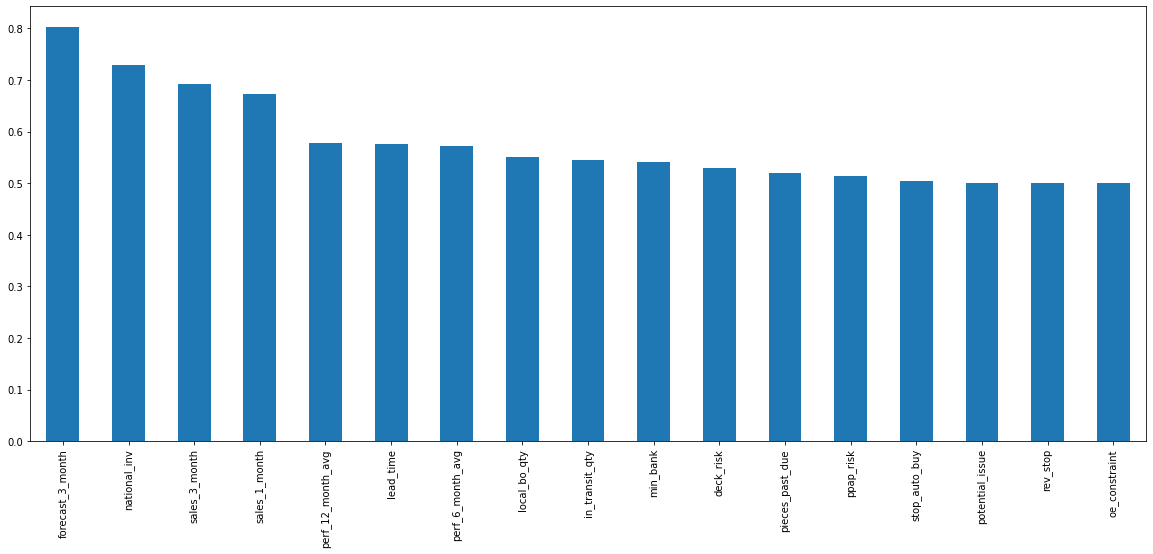

In [668]:
# let's add the variable names and order it for clearer visualisation
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [669]:
# by removing features with univariate roc_auc == 0.5
# we remove another 30 features
 
selected_feat = roc_values[roc_values>0.5]
len(selected_feat), X_train.shape[1]

(17, 17)

In [670]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [671]:
# fit a lasso and select features, make sure to select l1
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2'))
sel_.fit(scaler.transform(X_train), y_train)
 
# remove features with zero coefficient from dataset
# and parse again as dataframe (output of sklearn is
# numpy array)
X_train_lasso = pd.DataFrame(sel_.transform(X_train))
X_test_lasso = pd.DataFrame(sel_.transform(X_test))
 
# add the columns name
X_train_lasso.columns = X_train.columns[(sel_.get_support())]
X_test_lasso.columns = X_train.columns[(sel_.get_support())]

In [672]:
 X_train_lasso.shape, X_test_lasso.shape

((1185135, 6), (507915, 6))

In [673]:
# filter methods - correlation
run_randomForests(X_train_corr,
                  X_test_corr,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.906925276593761
Test set
Random Forests roc-auc: 0.908061091289129


In [674]:
# filter methods - univariate roc-auc
run_randomForests(X_train[selected_feat.index],
                  X_test_corr[selected_feat.index],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.906925276593761
Test set
Random Forests roc-auc: 0.908061091289129


In [675]:
# embedded methods - Lasso
run_randomForests(X_train_lasso,
                  X_test_lasso,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9004131106971509
Test set
Random Forests roc-auc: 0.902320452319987


In [676]:
# filter methods - correlation
scaler = StandardScaler().fit(X_train_corr)
 
run_logistic(scaler.transform(X_train_corr),
             scaler.transform(X_test_corr),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8750145200754976
Test set
Logistic Regression roc-auc: 0.8793524918032443


In [677]:
# filter methods - univariate roc-auc
scaler = StandardScaler().fit(X_train[selected_feat.index])
 
run_logistic(scaler.transform(X_train[selected_feat.index]),
             scaler.transform(X_test_corr[selected_feat.index]),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8750145200754976
Test set
Logistic Regression roc-auc: 0.8793524918032443


In [678]:
# embedded methods - Lasso
run_logistic(X_train_lasso,
                  X_test_lasso,
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8838915692584725
Test set
Logistic Regression roc-auc: 0.884819526655752


In [679]:
X_train_lasso.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'sales_1_month', 'sales_3_month'],
      dtype='object')

#Sampling

In [681]:
sam=pd.read_csv("/content/drive/MyDrive/Predict Back orders/Kaggle_Training_Dataset.csv")

In [682]:
sam.isnull().sum()

sku                       0
national_inv              0
lead_time            101334
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

In [683]:
sam['went_on_backorder'].value_counts()

No     1682136
Yes      10914
Name: went_on_backorder, dtype: int64

In [684]:
data=sam[['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'sales_1_month', 'sales_9_month','went_on_backorder']]

In [685]:
data

,national_inv,lead_time,in_transit_qty,forecast_3_month,sales_1_month,sales_9_month,went_on_backorder
0,23,NaN,0,0,0,0,No
1,2,NaN,0,0,0,0,No
2,6,NaN,0,0,0,0,No
3,87,NaN,0,0,0,5,No
4,315,NaN,0,0,0,11,No
...,...,...,...,...,...,...,...
1693045,-1,8.0,6,6,5,15,No
1693046,3288,8.0,1881,3520,1532,15398,No
1693047,-13,8.0,0,75,69,168,No
1693048,3463,12.0,144,0,202,875,No


In [686]:
renaming={"went_on_backorder":{"Yes":1,"No":0}}
data.replace(renaming,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [687]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693050 entries, 0 to 1693049
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   national_inv       int64  
 1   lead_time          float64
 2   in_transit_qty     int64  
 3   forecast_3_month   int64  
 4   sales_1_month      int64  
 5   sales_9_month      int64  
 6   went_on_backorder  int64  
dtypes: float64(1), int64(6)
memory usage: 90.4 MB


In [688]:
# Let's divide into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels='went_on_backorder', axis=1),  # predictors
    data['went_on_backorder'],  # target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1185135, 6), (507915, 6))

In [689]:
median_imputer.fit(X_train)

MeanMedianImputer(imputation_method='median', variables=['lead_time'])

In [690]:
# let's transform the data with the pipeline
X_train_imp= median_imputer.transform(X_train)
X_test_imp= median_imputer.transform(X_test)



In [691]:
X_test_imp.isnull().sum()

national_inv        0
lead_time           0
in_transit_qty      0
forecast_3_month    0
sales_1_month       0
sales_9_month       0
dtype: int64

In [692]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 7621
Before OverSampling, counts of label '0': 1177514 



In [693]:
from imblearn.over_sampling import SMOTE 

In [694]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train_imp, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [695]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


After OverSampling, the shape of train_X: (2355028, 6)
After OverSampling, the shape of train_y: (2355028,) 

After OverSampling, counts of label '1': 1177514
After OverSampling, counts of label '0': 1177514


In [696]:
pd.DataFrame(y_test).isnull().sum()

went_on_backorder    0
dtype: int64

In [697]:
run_randomForests(X_train_res, X_test_imp, y_train_res, y_test)

Train set
Random Forests roc-auc: 0.9398263761812624
Test set
Random Forests roc-auc: 0.9292503971212973


In [698]:
run_logistic(X_train_res, X_test_imp, y_train_res, y_test)

Train set
Logistic Regression roc-auc: 0.8498912789498455
Test set
Logistic Regression roc-auc: 0.842992675434972


In [699]:
from imblearn.under_sampling import NearMiss


In [700]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
X_under_samp,y_under_samp = nm.fit_sample(X_train_imp,y_train)
X_test_under_samp,y_test_under_samp = nm.fit_sample(X_test_imp,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [701]:
run_randomForests(X_under_samp, X_test_under_samp, y_under_samp,y_test_under_samp)

Train set
Random Forests roc-auc: 0.97250051872738
Test set
Random Forests roc-auc: 0.9762829139358173


In [702]:
run_logistic(X_under_samp,X_test_under_samp, y_under_samp,y_test_under_samp)

Train set
Logistic Regression roc-auc: 0.9588878657152855
Test set
Logistic Regression roc-auc: 0.9671870661422896


# Best Model Selection

In [703]:
# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb#  for this i have to install package  "  !pip install lightgbm "
import xgboost as xgb

In [704]:
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

In [705]:
names = ["Logistic Regression", "Nearest Neighbors", "Naive Bayes", "Linear SVM", "RBF SVM", 
          "Decision Tree", "Random Forest", "AdaBoost", "Gradient Boosting", 
         "LDA", "QDA", "Neural Net", "LightGBM", "XGBoost" ]

In [706]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(5),
    GaussianNB(),
    SVC(kernel="linear", C=0.025),
    SVC(kernel = "rbf", gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(alpha=1, max_iter=1000),
    lgb.LGBMClassifier(),    
    xgb.XGBClassifier()
   ]

In [707]:
nm = NearMiss()#NearMiss do not take random_state arguement 
X_train_under_samp,y_train_under_samp = nm.fit_sample(X_train_imp,y_train)
X_test_under_samp,y_test_under_samp = nm.fit_sample(X_test_imp,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [708]:
accuracy_scores = []
roc_auc_score=[]
# iterate over classifiers and predict accuracy
for name, clf in zip(names, classifiers):
    clf.fit(X_train_under_samp, y_train_under_samp)
    score = clf.score(X_test_under_samp, y_test_under_samp)
    score = round(score, 4)
    accuracy_scores.append(score)
    print(name ,' : ' , score )


Logistic Regression  :  0.9217
Nearest Neighbors  :  0.937
Naive Bayes  :  0.879
Linear SVM  :  0.9224
RBF SVM  :  0.9409
Decision Tree  :  0.9317
Random Forest  :  0.9277
AdaBoost  :  0.9318
Gradient Boosting  :  0.9387
LDA  :  0.607
QDA  :  0.8775
Neural Net  :  0.9265
LightGBM  :  0.9435
XGBoost  :  0.9355


In [709]:
classifiers_performance = pd.DataFrame({"Classifiers": names, "Accuracy Scores": accuracy_scores})
classifiers_performance

,Classifiers,Accuracy Scores
0,Logistic Regression,0.9217
1,Nearest Neighbors,0.9370
2,Naive Bayes,0.8790
3,Linear SVM,0.9224
4,RBF SVM,0.9409
5,Decision Tree,0.9317
6,Random Forest,0.9277
7,AdaBoost,0.9318
8,Gradient Boosting,0.9387
9,LDA,0.6070


In [710]:
#printing accuracy score in descending order
classifiers_performance.sort_values(by = 'Accuracy Scores' , ascending = False)[['Classifiers', 'Accuracy Scores']]

,Classifiers,Accuracy Scores
12,LightGBM,0.9435
4,RBF SVM,0.9409
8,Gradient Boosting,0.9387
1,Nearest Neighbors,0.9370
13,XGBoost,0.9355
7,AdaBoost,0.9318
5,Decision Tree,0.9317
6,Random Forest,0.9277
11,Neural Net,0.9265
3,Linear SVM,0.9224


Here we can see that LightGBM given more accuracy so our final model will be on LightGBM

#FINAL MODEL

In [734]:
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

We are taking only those features we got using feature selection model using lasso

In [735]:
data=pd.read_csv("/content/drive/MyDrive/Predict Back orders/Kaggle_Training_Dataset.csv")
data=data[['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'sales_1_month', 'sales_9_month','went_on_backorder']]
renaming={"went_on_backorder":{"Yes":1,"No":0}}
data.replace(renaming,inplace=True)
median_imputer.fit(data)
data_imp= median_imputer.transform(data)
data_imp.isnull().sum()
submission = pd.read_csv('/content/drive/MyDrive/Predict Back orders/Kaggle_Test_Dataset.csv')
submission=submission[['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'sales_1_month', 'sales_9_month','went_on_backorder']]
renaming={"went_on_backorder":{"Yes":1,"No":0}}
submission.replace(renaming,inplace=True)
median_imputer.fit(submission)
submission_imp= median_imputer.transform(submission)
submission_imp.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
sales_1_month        0
sales_9_month        0
went_on_backorder    0
dtype: int64

In [736]:
X_train=data_imp[['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'sales_1_month', 'sales_9_month']]
y_train=data_imp[['went_on_backorder']]
X_test=submission_imp[['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'sales_1_month', 'sales_9_month']]
y_test=submission_imp[['went_on_backorder']]

In [737]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [738]:
y_pred=clf.predict(X_test)

In [739]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9892


In [740]:
y_pred_train = clf.predict(X_train)

In [741]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9930


In [742]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9930
Test set score: 0.9892


Training and Testing accuracy is comparable so there is no orverfitting problem

In [743]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[239085    383]
 [  2237    112]]

True Positives(TP) =  239085

True Negatives(TN) =  112

False Positives(FP) =  383

False Negatives(FN) =  2237


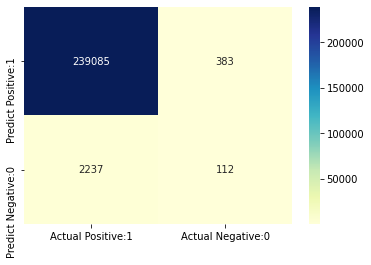

In [744]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [728]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
